<a href="https://colab.research.google.com/github/vsemwal/human-walking-activities/blob/master/FABRIK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as m
import sys
import matplotlib.pyplot as plt 
import numpy

In [ ]:
link_length = 2
start = [0,0]

In [ ]:
def distance(p1, p2):
    x = float(p2[0] - p1[0])
    y = float(p2[1] - p1[1])
    u = min(x, y)
    v = max(x, y)
    temp = float("inf") if v == 0 else u/v
    return abs(v) * m.sqrt(1 + temp**2)

def isValidGoal(goal):
  reachable = distance(start, goal)
  if(reachable <= no_of_links*link_length):
    return True
  return False

In [ ]:
def newPoint(P, Q):
  mag = link_length / m.sqrt((P[0]-Q[0])**2 + (P[1]-Q[1])**2)
  point = [(Q[0]-P[0])*mag + P[0], (Q[1]-P[1])*mag + P[1]]
  point = [round(num, 2) for num in point]
  #print(point)
  return point

def backward(listPoints):
  size = len(listPoints)
  listPoints[size-1] = goal
  for i in range(size-2, -1, -1) :
    listPoints[i] = newPoint(listPoints[i+1], listPoints[i])
  return listPoints

def forward(listPoints):
  size = len(listPoints)
  listPoints[0] = start
  for i in range(1, size):
    listPoints[i] = newPoint(listPoints[i-1], listPoints[i])
  return listPoints

#print(backward([[0, 0], [1.41, 1.41], [1.93, 3.35]]))
##print(forward([[-0.82, -0.82], [0.59, 0.59], [2, 2]]))
##print(forward(backward([[0, 0], [1.4142135623730951, 1.4142135623730951], [2.8284271247461903, 2.8284271247461903]])))

In [ ]:
def forwardKinematics(no_of_links, jointAngle) :
    listPoints = [start]
    for i in range(1,no_of_links+1):
      angle = 0
      for j in range(0,i) :
        angle = angle + jointAngle[j]
      p = [listPoints[i-1][0] + link_length*m.cos(angle), listPoints[i-1][1] + link_length*m.sin(angle)]
      p = [round(x,2) for x in p]
      listPoints.append(p)
    return listPoints
#print(forwardKinematics(2, [m.radians(i) for i in [35, 30]]))

In [ ]:
def newLinkPosition(listPoints):
  size = len(listPoints)
  count = 0
  while distance(goal, listPoints[size-1]) > 0.001:
    listPoints = forward(backward(listPoints))
    count += 1
  return listPoints, count

no_of_links = int(input("Enter number of Links : "))
jointAngle = []
for i in range(0,no_of_links):
    jointAngle.append(m.radians(float(input("Enter Joint Angle : "))))
listPoints = forwardKinematics(no_of_links, jointAngle)

goal[0] = float(input("Enter x co-ordinate of Goal point : "))
goal[1] = float(input("Enter y co-ordinate of Goal point : "))

print("Initial Positions of Links ", listPoints)
print(distance(goal, listPoints[2]))
if(isValidGoal(goal)):
  listPoints, iterations = newLinkPosition(listPoints)
  print("Final Position of Links ", listPoints)
  print("Total Iternation ", iterations)
else :
  print("Goal Point not in Reachable Space")

Enter number of Links : 4
Enter Joint Angle : 35
Enter Joint Angle : 25
Enter Joint Angle : 45
Enter Joint Angle : 60
Enter x co-ordinate of Goal point : 5
Enter y co-ordinate of Goal point : 5
Initial Positions of Links  [[0, 0], [1.64, 1.15], [2.64, 2.88], [2.12, 4.81], [0.19, 5.33]]
3.1723808094237365
Final Position of Links  [[0, 0], [1.64, 1.15], [2.63, 2.89], [3.0, 4.86], [5.0, 5.0]]
Total Iternation  1


[0.   1.64 2.63 3.   5.  ] [0.   1.15 2.89 4.86 5.  ]


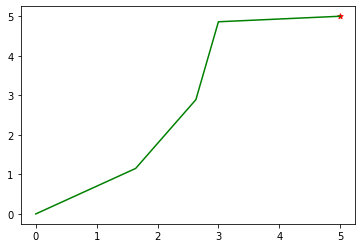

In [ ]:
plt.scatter(goal[0], goal[1], label= "stars", color= "red", marker= "*", s=30) 

a = numpy.array(listPoints)
x = a[:, 0]
y = a[:, 1]
print(x,y)
 
plt.plot(x, y, color='green', label= "FABRIK") 
plt.show()

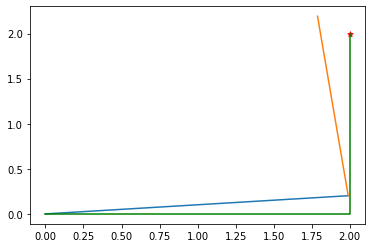

In [ ]:
l1 =l2 =2

def twoLinkAngleCal(x,y):
    try :
        a2 = m.degrees(m.acos((x**2 + y**2 - l1**2 - l2**2) / (2*l1*l2)))
        alpha = m.degrees(m.atan(y/x))
        beta = m.degrees(m.asin(l2 * m.sin(a2) / m.sqrt(x**2 + y**2)))
        a1 = alpha - beta
        return round(a1,2), round(a2,2)
    except Exception:
        pass

def calculateCoordinate(point, angle, length):
    x, y = point
    endy = y + length * m.sin(m.radians(angle))
    endx = x + length * m.cos(m.radians(angle))
    ##print(endx,endy)
    
    plt.plot([x, endx], [y, endy])
    return endx,endy

try : 
  a1, a2 = twoLinkAngleCal(goal[0],goal[1])
  point = calculateCoordinate([0,0],a1,l1)
  calculateCoordinate(point,a1+a2,l2)
except Exception:
  pass

plt.scatter(goal[0], goal[1], label= "stars", color= "red", marker= "*", s=30) 
 
x = [0, listPoints[1][0], listPoints[2][0]] 
y = [0, listPoints[1][1], listPoints[2][1]] 
 
plt.plot(x, y, color='green', label= "FABRIK") 
plt.show()